In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
m = 20
k = 4
n = 10

for j in range(100):
    A = np.random.normal(size=(m,n))
    R = np.random.normal(size=(k,n))
    R[:,1] = R[:,0]
    Q = np.linalg.inv((A.T @ A) + (R.T @ R))
    Z = A @ Q @ A.T
    if not np.all(np.abs(np.linalg.eigvals(Z)) <= 1 + 1e-5):
        print("found one")

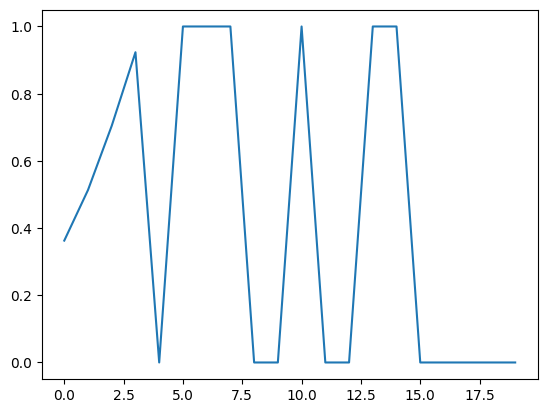

In [31]:
plt.plot(np.abs(np.linalg.eigvals(Z)))
plt.show()

In [12]:
np.all(np.abs(np.linalg.eigvals(Z)) <= 1)

True

In [44]:
m = 4
n = 10
delta = 1e-3


A = np.random.normal(size=(m,n))
Q = (A.T @ A) + delta*np.eye(n)
psdet = np.linalg.det(Q)/(delta**(n-m))
print(psdet)

511.5269771882694


In [45]:
eigvals = np.linalg.eigvalsh(A.T @ A)
nz_eigvals = eigvals[np.where(eigvals > 1e-14)]
exact_psdet = np.prod(nz_eigvals)
print(exact_psdet)

510.9396838507503


In [74]:
m = 2
n = 4
delta = 1e-3
#np.random.seed(0)

Z = np.random.normal(size=(n,n))
Z = Z.T @ Z
Z = Z/np.amax(np.linalg.eigvalsh(Z))
#z = np.random.normal(size=n)
#Z = np.diag(z)

A = np.random.normal(size=(m,n))
np.linalg.eigh(A.T @ A)

Q = (A.T @ A) + delta*Z
psdet = np.linalg.det(Q)/(delta**(n-m))
print(psdet)

0.5002235072589187


In [77]:
np.linalg.eigh(A.T @ A)

EighResult(eigenvalues=array([-4.67355823e-16,  2.32666134e-17,  6.59727040e-01,  3.77899327e+00]), eigenvectors=array([[-0.14994007,  0.34283298,  0.87628386, -0.30349648],
       [ 0.95560194,  0.12837645,  0.18056957,  0.1942654 ],
       [-0.25358442,  0.2593788 ,  0.17232039,  0.91581836],
       [-0.00615188,  0.89370447, -0.4121006 , -0.17727825]]))

In [75]:
eigvals = np.linalg.eigvalsh(A.T @ A)
nz_eigvals = eigvals[np.where(eigvals > 1e-15)]
exact_psdet = np.prod(nz_eigvals)
print(exact_psdet)

2.4931040434250886


In [76]:
psdet/exact_psdet

0.20064285266318013

In [109]:
m = 2
n = 4
delta = 1e-14
#np.random.seed(0)
AtA = A.T @ A
_, P = np.linalg.eigh(AtA)

z = np.abs(np.random.normal(size=n)) + 1.0
Z = P.T @ np.diag(z) @ P


Q = (A.T @ A) + delta*Z
psdet = np.linalg.det(Q)/(delta**(n-m))
print(psdet)

9.321843317237454


In [110]:
eigvals = np.linalg.eigvalsh(AtA)
nz_eigvals = eigvals[np.where(eigvals > 1e-15)]
exact_psdet = np.prod(nz_eigvals)
print(exact_psdet)

2.4931040434250886


In [125]:
k = 3
m = 10
n = 8
delta = 1e-4
#np.random.seed(0)
a = np.abs(np.random.normal(size=n)) + 1.0
A = np.zeros((m,n))
np.fill_diagonal(A, a)
AtA = A.T @ A
_, P = np.linalg.eigh(AtA)

z = np.abs(np.random.normal(size=min([k,n]))) + 1.0
# Z = P.T @ np.diag(z) @ P
Z = np.zeros((k,n))
np.fill_diagonal(Z, z)
ZtZ = Z.T @ Z

Q = AtA + delta*ZtZ
psdet = np.linalg.det(Q)/(delta**(n-m))
print(psdet)

1.3937383471892636e-05


In [126]:
eigvals = np.linalg.eigvalsh(AtA)
nz_eigvals = eigvals[np.where(eigvals > 1e-15)]
exact_psdet = np.prod(nz_eigvals)
print(exact_psdet)

1393.369472052764


In [127]:
psdet/exact_psdet

1.0002647360545055e-08

# Det ratio?

### Case 1:

In [230]:
m = 4
k = 4
n = 8

n_tries = 100
for j in range(n_tries):
    d = np.abs(np.random.normal(size=k)) + 1.0
    D = np.diag(d)
    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))
    RtDR = R.T @ D @ R
    FtF = F.T @ F
    Q = FtF + RtDR
    det_Q = np.linalg.det(Q)
    det_D = np.linalg.det(D)
    det_RtDR = np.linalg.det(RtDR)
    ratio = det_RtDR/det_Q 
    if ratio > 1:
        print(ratio)


In [227]:
m = 4
k = 4
n = 8

n_tries = 100
for j in range(n_tries):
    d = (1e4)*np.abs(np.random.normal(size=k)) 
    D = np.diag(d)
    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))
    RtDR = R.T @ D @ R
    FtF = F.T @ F
    Q = FtF + RtDR
    det_Q = np.linalg.det(Q)
    det_D = np.linalg.det(D)
    det_RtDR = np.linalg.det(RtDR)
    ratio = det_D/det_Q 
    if ratio > 1:
        print(ratio)

1.9198403537193711
3.909080956001472
85.36560982121281


In [231]:
def pseudodet(A, delta=1e-5):
    n = A.shape[1]
    r = np.linalg.matrix_rank(A)
    psdet = np.linalg.det(A + delta*np.eye(n))/(delta**(n-r))
    return psdet

In [371]:
m = 10
k = 5
n = 8

n_tries = 100
for j in range(n_tries):
    d = (1e3)*np.abs(np.random.normal(size=k))
    D = np.diag(d)
    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))
    RtDR = R.T @ D @ R
    FtF = F.T @ F
    Q = FtF + RtDR
    det_Q = np.linalg.det(Q)
    det_D = np.linalg.det(D)
    pdet_RtDR = pseudodet(RtDR, delta=1e-14)
    #pdet_RtDR = np.linalg.det(RtDR)
    ratio = pdet_RtDR/det_Q 
    if ratio > 1:
        print(ratio)

23.771021689510494
12.644794418654941
13.460565279128572
8.88288703507141
9.982718155248095
1322.7549501919145
56.71434682970045
110.54259312239843
6.220815760494494
35.19706050562309
138.03317635550448
11.159624102755552
1.1228183737226658
39.2767655726342
4.0905775683994
4.562117698204531
704.0534282792771
6.2150959689670495
10.046310448321924
8.168557099773015
206.63767950191843
29.701264234815255
3.4697952767961207
1.375448724623984
1.6594303739841783
7.435325585450465
1.7339231470026006
3.346938421847478
18.87994491495263
12.953772003798798
155.75986107786255
10.190865468094922
1.3747585583126392
2.6839852376950435
21.522634909863537
79.51365377175293
3.126763547528791


In [406]:
m = n
k = 3
n = 4

R = np.random.normal(size=(k,n))
F = np.random.normal(size=(m,n))

n_tries = 100
n_fails = 0
for j in range(n_tries):
    d = (1e5)*np.abs(np.random.normal(size=k))
    D = np.diag(d)
    
    RtDR = R.T @ D @ R
    FtF = F.T @ F
    Q = FtF + RtDR
    det_Q = np.linalg.det(Q)
    det_D = np.linalg.det(D)
    pdet_RtDR = pseudodet(RtDR, delta=1e-14)
    #pdet_RtDR = np.linalg.det(RtDR)
    ratio = pdet_RtDR/det_Q 
    if ratio > 1:
        n_fails += 1

print(n_fails)

27


In [410]:
A = np.random.normal(size=(n,n))
A = A.T @ A

In [413]:
2*np.log(np.diag(np.linalg.cholesky(A))).sum()

2.3754535421166447

In [414]:
np.log(np.linalg.det(A))

2.375453542116646

# Again but with logdet

In [567]:
def logdet(A):
    n = A.shape[1]
    ldet = 2*np.log(np.diag(np.linalg.cholesky(A))).sum()
    return ldet

def logpdet(A, delta=1e-5):
    n = A.shape[1]
    r = np.linalg.matrix_rank(A)
    B = A + delta*np.eye(n)
    ldet = 2*np.log(np.diag(np.linalg.cholesky(B))).sum()
    ldet -= (n-r)*np.log(delta) # Subtract off denominator
    return ldet


def logpdetmod(A, p=5):
    n = A.shape[1]
    r = np.linalg.matrix_rank(A)
    B = A + (10**(-p))*np.eye(n)
    ldet = 2*np.log(np.diag(np.linalg.cholesky(B))).sum()
    ldet -= (n-r)*(-p)*np.log(10) # Subtract off denominator
    return ldet

In [568]:
m = 8
k = 3
n = 4


n_tries = 10000
n_fails = 0
for j in range(n_tries):
    d = (1e3)*np.abs(np.random.normal(size=k))
    D = np.diag(d)
    
    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))

    RtDR = R.T @ D @ R
    FtF = F.T @ F
    Q = FtF + RtDR
    ldet_Q = logdet(Q)
    ldet_D = logdet(D)
    lpdet_RtDR = logpdet(RtDR, delta=1e-6)
    #pdet_RtDR = np.linalg.det(RtDR)
    log_ratio = lpdet_RtDR - ldet_Q
    if log_ratio > 1e-12:
        print(lpdet_RtDR)
        print(ldet_Q)
        print()
        n_fails += 1

print(n_fails)

23.689837647564
23.618625558146224

23.249337795235046
22.791742225201773

19.123074568846036
18.803880940582133

24.51579565668675
24.12670981306475

21.086730139541114
20.20087248726929

22.95485296089403
22.693246379907777

23.873687776399464
23.338329682126858

21.365703909579963
21.19232787651652

26.05718853494231
25.59239066691796

25.995498728771842
25.988988110888567

21.161242687504945
21.050349218492194

24.409953315316123
24.379748320281905

12


### Test

In [587]:
def eigval_logpdet(A, thresh=1e-10):
    eigvals = np.linalg.eigvalsh(R.T @ R)
    nz_eigvals = eigvals[eigvals > thresh]
    return np.log(nz_eigvals).sum()

In [ ]:
F.T @ F

In [593]:
m = 2
k = 9
n = 10


n_tries = 10000
n_fails = 0
for j in range(n_tries):

    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))

    #RtDR = R.T @ R
    RtDR = (1e0)*(R.T @ R)
    FtF = F.T @ F
    Q = FtF + RtDR
    ldet_Q = logdet(Q)
    ldet_D = logdet(D)
    #lpdet_RtDR = logpdet(RtDR, delta=1e-10)
    lpdet_RtDR = eigval_logpdet(RtDR, thresh=1e-14)
    #lpdet_RtDR = logpdetmod(RtDR, p=10)
    #pdet_RtDR = np.linalg.det(RtDR)
    log_ratio = lpdet_RtDR - ldet_Q
    if log_ratio > 1e-12:
        print(lpdet_RtDR)
        print(ldet_Q)
        print(np.linalg.matrix_rank(Q))
        print()
        n_fails += 1

print(n_fails)

12.622797306375421
12.501747768211011
10

11.33396232299326
9.788648605766895
10

15.930125037352012
13.49479896616696
10

13.212140984293548
13.079581156567425
10

9.637349840862226
8.323786560644397
10

15.916336174325469
11.787281576819652
10

13.891251849749613
13.833986308593463
10

15.807897386553117
15.551396611683149
10

14.624025937406573
14.576402844725507
10

11.287936301210522
10.941466627191346
10

12.716658735765588
12.005851181358175
10

16.59658807057694
16.132878956231
10

15.23567059976995
14.415752385342802
10

13.34212887465985
13.094972881475964
10

13.456493230743142
13.240514709349819
10

15.269931684467394
13.699416594608822
10

14.444887073696137
14.098594941468845
10

15.192533384588124
15.052901993984527
10

11.615488546177053
11.559029871198357
10

15.001791040385296
14.52524016979595
10

10.62782008984738
10.420672660362296
10

15.064510142088139
14.210084934292704
10

14.158848219957274
14.140646797787102
10

12.814115176992212
12.745966708764605
10

15.78

In [595]:
m = 2
k = 9
n = 10


n_tries = 10000
n_fails = 0
for j in range(n_tries):

    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))

    #RtDR = R.T @ R
    RtDR = (1e-2)*(R.T @ R)
    FtF = F.T @ F
    Q = FtF + RtDR
    ldet_Q = logdet(Q)
    ldet_D = logdet(D)
    #lpdet_RtDR = logpdet(RtDR, delta=1e-10)
    lpdet_RtDR = eigval_logpdet(RtDR, thresh=1e-14)
    #lpdet_RtDR = logpdetmod(RtDR, p=10)
    #pdet_RtDR = np.linalg.det(RtDR)
    log_ratio = lpdet_RtDR - ldet_Q
    if log_ratio > 1e-12:
        print(lpdet_RtDR)
        print(ldet_Q)
        print(np.linalg.matrix_rank(Q))
        print()
        n_fails += 1

print(n_fails)

12.96526834136383
-23.451215023486768
10

14.855052973473207
-22.740560082912097
10

10.138017669836985
-22.054651215173955
10

13.515742699470604
-19.73792209071464
10

14.809739962161112
-20.822320120717663
10

14.446309703528998
-22.187356613355465
10

15.364920916962813
-20.385498246528144
10

10.428109089734335
-23.351825634581445
10

13.937668490289415
-20.497341603488852
10

13.307047822934031
-20.795392812835686
10

12.467436402395377
-22.55997688899254
10

13.680596857458756
-20.82633041716968
10

12.285376425476896
-20.712266941947192
10

15.490626891788763
-22.02380401561251
10

12.070038567745664
-26.953685247491247
10

9.236034194641775
-20.286074660368108
10

8.946893248123601
-24.97047436836649
10

13.318838766608765
-18.84003485004842
10

15.764099870566898
-18.198285536429367
10

11.040835133261764
-24.72776162060728
10

12.276505439895907
-19.785996465377416
10

12.196369303483738
-21.32691047595413
10

15.736221307780962
-19.74874333714645
10

14.621353073867787
-22.

In [ ]:
m = 2
k = 9
n = 10

n_tries = 10000
n_fails = 0
for j in range(n_tries):

    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))
    

    #RtDR = R.T @ R
    RtDR = (1e-2)*(R.T @ R)
    FtF = F.T @ F
    Q = FtF + RtDR
    ldet_Q = logdet(Q)
    ldet_D = logdet(D)
    #lpdet_RtDR = logpdet(RtDR, delta=1e-10)
    lpdet_RtDR = eigval_logpdet(RtDR, thresh=1e-14)
    #lpdet_RtDR = logpdetmod(RtDR, p=10)
    #pdet_RtDR = np.linalg.det(RtDR)
    log_ratio = lpdet_RtDR - ldet_Q
    if log_ratio > 1e-12:
        print(lpdet_RtDR)
        print(ldet_Q)
        print(np.linalg.matrix_rank(Q))
        print()
        n_fails += 1

print(n_fails)

# Modification where we use GSVD normalization?

In [603]:
m = 2
k = 9
n = 10

n_tries = 4
n_fails = 0
for j in range(n_tries):

    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))

    RtDR = R.T @ R
    FtF = F.T @ F
    Q = FtF + RtDR

    # Get nonzero singular values of stacked matrix
    H = np.vstack([F, R])
    Hsvd = np.linalg.svd(H)
    Hsvals = Hsvd.S
    
    # Get log determinant of H^2
    G1 = 2*np.log(Hsvals).sum()

    #RtDR = R.T @ R
   
    G2 = logdet(Q)
    print(G1)
    print(G2)
    print()

print(n_fails)

21.212534193676397
21.212534193676394

14.425626560626892
14.425626560626897

15.682916418488405
15.682916418488396

17.49804534492671
17.498045344926705

0


In [ ]:
m = 2
k = 9
n = 10

n_tries = 10000
n_fails = 0
for j in range(n_tries):

    R = np.random.normal(size=(k,n))
    F = np.random.normal(size=(m,n))

    RtDR = (1e-2)*(R.T @ R)
    FtF = F.T @ F
    Q = FtF + RtDR

    # Get nonzero singular values of stacked matrix
    H = np.vstack([F, R])
    Hsvd = np.linalg.svd(H)
    Hsvals = Hsvd.S
    
    # Get determinant of H^2

    #RtDR = R.T @ R
   
    ldet_Q = logdet(Q)
    ldet_D = logdet(D)
    #lpdet_RtDR = logpdet(RtDR, delta=1e-10)
    lpdet_RtDR = eigval_logpdet(RtDR, thresh=1e-14)
    #lpdet_RtDR = logpdetmod(RtDR, p=10)
    #pdet_RtDR = np.linalg.det(RtDR)
    log_ratio = lpdet_RtDR - ldet_Q
    if log_ratio > 1e-12:
        print(lpdet_RtDR)
        print(ldet_Q)
        print(np.linalg.matrix_rank(Q))
        print()
        n_fails += 1

print(n_fails)